# PSM for coral Sr/Ca

In this tutorial, we introduce the PSM for coral Sr/Ca in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)

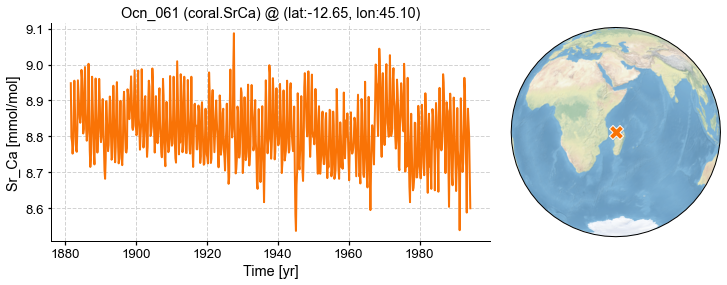

In [3]:
pdb_sub = pdb.filter(by='ptype', keys=['SrCa'])
pobj = pdb_sub.records['Ocn_061']
fig, ax = pobj.plot()

### Model

In [4]:
%%time

dirpath = './data/icesm_last_millennium_historical'
model_tos = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tos_sfc_Omon_iCESM_past1000historical_085001-200512_interp.nc'))

CPU times: user 980 ms, sys: 7.35 ms, total: 987 ms
Wall time: 1.05 s


## Get climate data for a specific `ProxyRecord`

In [5]:
%%time

pobj.del_clim()
pobj.get_clim(model_tos, tag='model')

CPU times: user 208 ms, sys: 3.1 s, total: 3.31 s
Wall time: 1min 24s


## Create a PSM object

In [6]:
mdl = cfr.psm.Coral_SrCa(pobj)

In [7]:
%%time
pp = mdl.forward()

CPU times: user 498 µs, sys: 537 µs, total: 1.03 ms
Wall time: 1.35 ms


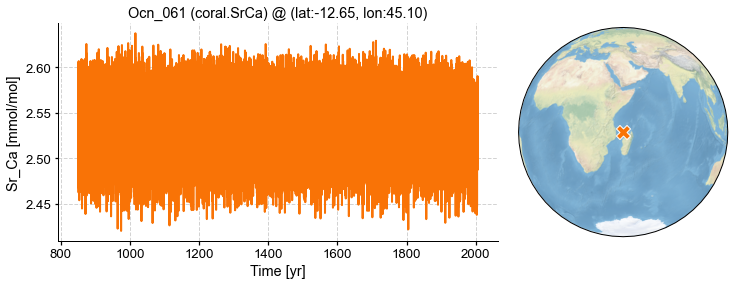

In [8]:
fig, ax = pp.plot()